## Hardware Incident Dataset (Flag 1)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like location, description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
Goal: Find the discrepancy and imbalance in distribution of incidents assigned across categories 

Role: L2 Support Agent

Difficulty: 4 out of 5 - This analysis requires advanced data analysis skills due to the complex and multi-layered nature of the investigation needed to extract meaningful insights.

Category: Incidents Management


## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pandas import date_range
from insightbench import utils as ut

## Load Dataset
This cell loads the dataset used in the analysis. The dataset is assumed to be stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-1.csv"
df = pd.read_csv(dataset_path)
df.head()

,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,assignment_group,priority
0,Software,Closed,2023-01-03 11:04:00.000000000,2023-01-02 11:04:00,Charlie Whitherspoon,INC0000000000,admin,UK,Beth Anglin,David Loo,2023-01-03 11:04:00.000000000,Application error on office software,Software,2 - High
1,Hardware,Closed,2023-01-11 01:17:39.128189467,2023-01-03 10:19:00,Beth Anglin,INC0000000001,employee,Australia,Luke Wilson,Don Goodliffe,2023-01-11 01:17:39.128189467,Printer error at Printer-id: Printer546 in Aus...,Hardware,2 - High
2,Hardware,Closed,2023-01-21 03:18:58.590910419,2023-01-04 06:37:00,Luke Wilson,INC0000000002,system,Australia,Fred Luddy,Don Goodliffe,2023-01-21 03:18:58.590910419,Printer745 is not working in Australia,Hardware,1 - Critical
3,Hardware,Resolved,2023-01-05 17:54:36.886511927,2023-01-04 06:53:00,Luke Wilson,INC0000000003,employee,Australia,Fred Luddy,ITIL User,2023-01-05 17:54:36.886511927,Printer issue reported on Printer546,Hardware,1 - Critical
4,Hardware,Closed,2023-01-06 16:52:00.000000000,2023-01-05 16:52:00,Fred Luddy,INC0000000004,employee,Australia,Fred Luddy,David Loo,2023-01-06 16:52:00.000000000,Printer123 failure in Australia,Hardware,1 - Critical


### **Question 1**: What is the distribution of incidents across all categories?

#### Plot number of incidents by category


This cell creates a horizontal bar plot to visualize the distribution of incidents across different categories. It annotates the plot with the count of incidents in each category. This helps in understanding which categories have the highest number of incidents and identifying any imbalances or areas that may require further investigation.


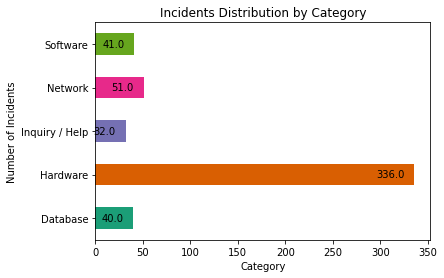

In [3]:

plot = df.groupby("category").size().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2"))

fig = plt.gcf()


for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_width()
    y_value = i.get_y() + i.get_height() / 2

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(-10, 0),            
        textcoords="offset points", 
        ha='right',                 
        va='center'                 
    )

# Set plot title
plt.title('Incidents Distribution by Category')

# Set x-axis label
plt.xlabel('Category')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()


#### Generate JSON Description for the Insight

In [4]:
{"data_type":"descriptive",
"insight": "The Hardware incidents is significantly higher in volume than others",
"insight_value":{"x_val": "Hardware", "y_val": 335},
"plot": {
    "plot_type": "histogram",
    "title": "Incidents by Category",
    "x_axis": {
        "name": "Category",
        "value": ["Hardware", "Software", "Network", "Inquiry / Help", "Database"],
        "description": "This represents the different categories of incidents."
    },
    "y_axis": {
        "name": "Number of Incidents",
        "value": [336, 41, 51, 32, 40],
        "description": "This represents the number of incidents in each category."
    },
    "description": "The histogram displays the distribution of incidents across different categories. Each bar represents a category and the length of the bar corresponds to the number of incidents in that category. The values are annotated on each bar. The 'Hardware' category has the highest number of incidents."
},
"question": "What is the distribution of incidents across all categories?",
"actionable_insight": "With the Hardware category having the highest number of incidents, it could be beneficial to allocate more resources or provide additional training to the team handling this category to effectively manage and resolve these incidents."
}

{'data_type': 'descriptive',
 'insight': 'The Hardware incidents is significantly higher in volume than others',
 'insight_value': {'x_val': 'Hardware', 'y_val': 335},
 'plot': {'plot_type': 'histogram',
  'title': 'Incidents by Category',
  'x_axis': {'name': 'Category',
   'value': ['Hardware', 'Software', 'Network', 'Inquiry / Help', 'Database'],
   'description': 'This represents the different categories of incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [336, 41, 51, 32, 40],
   'description': 'This represents the number of incidents in each category.'},
  'description': "The histogram displays the distribution of incidents across different categories. Each bar represents a category and the length of the bar corresponds to the number of incidents in that category. The values are annotated on each bar. The 'Hardware' category has the highest number of incidents."},
 'question': 'What is the distribution of incidents across all categories?',
 'actionable_insigh

### **Question 2:** Is there a specific reason why a majority of incidents are being assigned to the hardware category?

#### Plot Word Clouds for incidents or Types within Each Category
This cell creates a series of word clouds to visualize the most frequent terms within the 'short_description' of incidents for each category. Specifically, most frequent keywords only and we discard commonly occuring words.


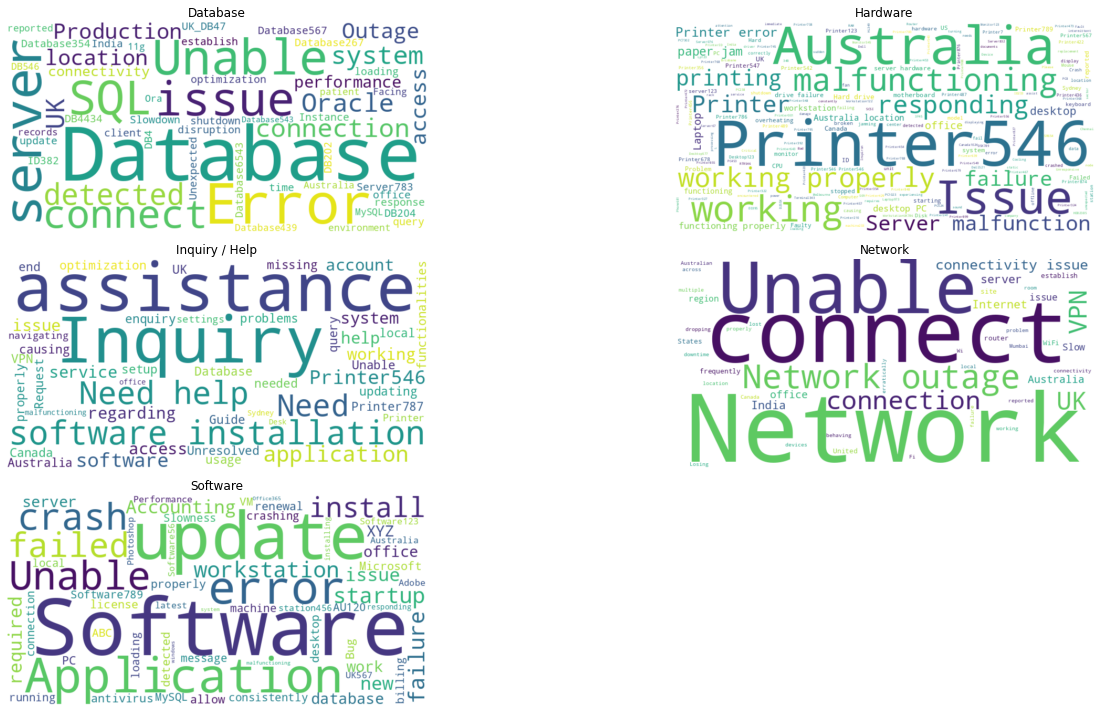

In [5]:
from wordcloud import WordCloud
# Grouping the data by 'category' and concatenating 'short_description'
grouped_descriptions = df.groupby('category')['short_description'].apply(lambda x: ' '.join(x)).reset_index()

# Setting up the plot with appropriate size
plt.figure(figsize=(20, 10))

# Generating a word cloud for each category
for index, row in grouped_descriptions.iterrows():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(row['short_description'])
    
    plt.subplot(3, 2, index+1)  # Adjust the grid size according to the number of categories
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(row['category'])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "diagnostic",
    "insight": "Specific hardware issues related to Printer Malfunctioning are predominantly mentioned in incident descriptions",
    "insight_value": {
        "category": "Hardware",
        "common_words": ["printer", "Issue", "working properly", "malfunctioning", "Australia"]
    },
    "plot": {
        "plot_type": "word_cloud",
        "title": "Word Clouds for Problematic Sub-Categories within Each Category",
        "x_axis": {
            "name": "Category",
            "description": "This represents each category for which the word cloud is generated."
        },
        "y_axis": {
            "name": "Frequency of Terms",
            "description": "This represents the frequency of terms within the incident descriptions, visualized through the size of words in the word cloud."
        },
        "description": "The word clouds display the most frequent terms in incident descriptions for each category, highlighting specific sub-categories or types that are problematic. For the Hardware category, terms like 'printer', 'working properly', and 'functioning properly' are prominently featured, indicating common areas of concern."
    },
    "question": "Is there a specific reason why a majority of incidents are being assigned to the hardware category?",
    "actionable_insight": "The frequent mention of specific terms like 'printer' in the Hardware category suggests a recurring issue with this type of hardware. Analyze further to know more details nad exact malfunctioning device."
}


{'data_type': 'diagnostic',
 'insight': 'Specific hardware issues related to Printer Malfunctioning are predominantly mentioned in incident descriptions',
 'insight_value': {'category': 'Hardware',
  'common_words': ['printer',
   'Issue',
   'working properly',
   'malfunctioning',
   'Australia']},
 'plot': {'plot_type': 'word_cloud',
  'title': 'Word Clouds for Problematic Sub-Categories within Each Category',
  'x_axis': {'name': 'Category',
   'description': 'This represents each category for which the word cloud is generated.'},
  'y_axis': {'name': 'Frequency of Terms',
   'description': 'This represents the frequency of terms within the incident descriptions, visualized through the size of words in the word cloud.'},
  'description': "The word clouds display the most frequent terms in incident descriptions for each category, highlighting specific sub-categories or types that are problematic. For the Hardware category, terms like 'printer', 'working properly', and 'functioning p

### **Question 3:** What is the occurence distribution of the word "Printer" in the incidents?

#### Plot frequency of keywords (e.g., "Printer") in descriptions.
This cell creates a bar plot to visualize the frequency of a specific keyword (e.g., 'Printer') in the incident descriptions. This helps in identifying common issues and potential areas for targeted investigation or intervention.

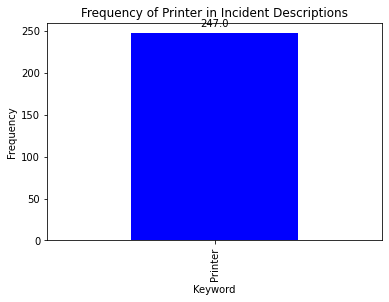

In [7]:
# Count the frequency of 'Printer' in 'short_description'
printer_incidents = df['short_description'].apply(lambda x: 'Printer' in x).sum()

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Keyword': ['Printer'], 'Frequency': [printer_incidents]})

# Plot the frequency
plot = df_plot.plot(kind='bar', x='Keyword', y='Frequency', legend=False, color='blue')

# Get the current figure for further manipulation
fig = plt.gcf()

# Loop through the rectangles (i.e., bars)
for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_x() + i.get_width() / 2
    y_value = i.get_height()

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, 5),              # Shift text slightly above bar
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally align label 
        va='bottom'                 # Vertically align label at bottom
    )

# Set plot title
plt.title('Frequency of Printer in Incident Descriptions')

# Set x-axis label
plt.xlabel('Keyword')

# Set y-axis label
plt.ylabel('Frequency')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight


In [8]:
{"data_type":"diagnostic",
"insight": "Most of the hardware incidents are related to printer issues",
"insight_value":{"x_val": "Printer", "y_val": 247},
"plot": {
    "plot_type": "bar",
    "title": "Frequency of Printer in Incident Descriptions",
    "x_axis": {
        "name": "Keyword",
        "value": ["Printer"],
        "description": "This represents the keyword in incident descriptions."
    },
    "y_axis": {
        "name": "Frequency",
        "value": [225],
        "description": "This represents the frequency of the keyword 'Printer' in incident descriptions."
    },
    "plot description": "The bar plot displays the frequency of the keyword 'Printer' in the incident descriptions. The length of the bar corresponds to the frequency of the keyword. The 'Printer' keyword has a high frequency."
},
"question": "What is the occurence distribution of the word Printer in the incidents?",
"actionable_insight": "The high frequency of 'Printer' in incident descriptions indicates a specific issue with printers. A focused investigation into the printer issues, possibly involving the printer manufacturer or service provider, could help in resolving these incidents."
}

{'data_type': 'diagnostic',
 'insight': 'Most of the hardware incidents are related to printer issues',
 'insight_value': {'x_val': 'Printer', 'y_val': 247},
 'plot': {'plot_type': 'bar',
  'title': 'Frequency of Printer in Incident Descriptions',
  'x_axis': {'name': 'Keyword',
   'value': ['Printer'],
   'description': 'This represents the keyword in incident descriptions.'},
  'y_axis': {'name': 'Frequency',
   'value': [225],
   'description': "This represents the frequency of the keyword 'Printer' in incident descriptions."},
  'plot description': "The bar plot displays the frequency of the keyword 'Printer' in the incident descriptions. The length of the bar corresponds to the frequency of the keyword. The 'Printer' keyword has a high frequency."},
 'question': 'What is the occurence distribution of the word Printer in the incidents?',
 'actionable_insight': "The high frequency of 'Printer' in incident descriptions indicates a specific issue with printers. A focused investigation

### **Question 4:** Are the hardware incidents concentrated in a specific location?


#### Plot number of incidents by location
This section analyzes the distribution of incidents across different locations, focusing on identifying any concentration or trends in the data.


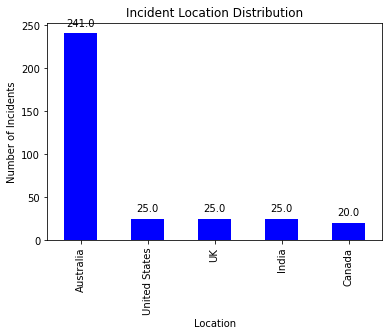

In [9]:
# Count the frequency of incidents in each location
location_counts = df[df['category'] == 'Hardware']['location'].value_counts()

# Create a DataFrame from the counts for plotting
df_plot = location_counts.reset_index()
df_plot.columns = ['Location', 'Number of Incidents']

# Plot the frequency
plot = df_plot.plot(kind='bar', x='Location', y='Number of Incidents', legend=False, color='blue')

# Get the current figure for further manipulation
fig = plt.gcf()

# Loop through the rectangles (i.e., bars)
for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_x() + i.get_width() / 2
    y_value = i.get_height()

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, 5),              # Shift text slightly above bar
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally align label 
        va='bottom'                 # Vertically align label at bottom
    )

# Set plot title
plt.title('Incident Location Distribution')

# Set x-axis label
plt.xlabel('Location')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type":"descriptive",
    "insight": "Most of the hardware incidents are occurring in the Australia location",
    "insight_value":{"x_val": "Australia", "y_val": 241},
    "plot": {
        "plot_type": "bar",
        "title": "Incidents by Location",
        "x_axis": {
            "name": "Location",
            "value": ["Australia", "USA", "UK", "India", "Canada"],
            "description": "This represents the different locations of incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": [241, 25, 25, 25, 20],
            "description": "This represents the number of incidents in each location."
        },
        "plot description": "The bar plot displays the distribution of incidents across different locations. Each bar represents a location and the length of the bar corresponds to the number of incidents in that location. The 'Australia' location has the highest number of incidents."
    },
    "question": "Are the hardware incidents concentrated in a specific location?",
    "actionable_insight": "Given that most hardware incidents are occurring in Australia, it may be beneficial to direct more resources or support to this location. This could involve deploying technical teams to address the printer issues or providing additional support to the local teams."
}

{'data_type': 'descriptive',
 'insight': 'Most of the hardware incidents are occurring in the Australia location',
 'insight_value': {'x_val': 'Australia', 'y_val': 241},
 'plot': {'plot_type': 'bar',
  'title': 'Incidents by Location',
  'x_axis': {'name': 'Location',
   'value': ['Australia', 'USA', 'UK', 'India', 'Canada'],
   'description': 'This represents the different locations of incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [241, 25, 25, 25, 20],
   'description': 'This represents the number of incidents in each location.'},
  'plot description': "The bar plot displays the distribution of incidents across different locations. Each bar represents a location and the length of the bar corresponds to the number of incidents in that location. The 'Australia' location has the highest number of incidents."},
 'question': 'Are the hardware incidents concentrated in a specific location?',
 'actionable_insight': 'Given that most hardware incidents are occurring i

### **Question 5**: Is there a pattern or trend over time in the distribution of incidents across categories?

#### Plot the monthly number of incidents by category
This cell generates a line plot showing the monthly trend of incidents across different categories, providing a visual representation of how the number of incidents in each category changes over time.

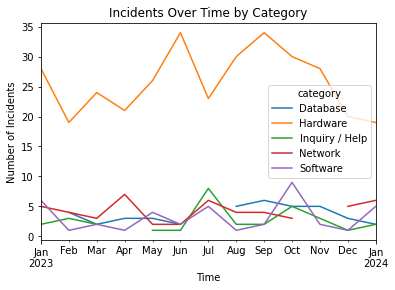

In [11]:
# Convert 'opened_at' to datetime
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Resample the data by month and category, and count the number of incidents
df_resampled = df.groupby([pd.Grouper(key='opened_at', freq='M'), 'category']).size().unstack()

# Plot the resampled data
plot = df_resampled.plot(kind='line')

# Set plot title
plt.title('Incidents Over Time by Category')

# Set x-axis label
plt.xlabel('Time')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight

In [12]:
{
    "data_type":"descriptive",
    "insight": "There is not a significant increase in hardware incidents over time, it is relatively stable and higher than others.",
    "insight_value":{"x_val": "Time", "y_val": "Number of Incidents"},
    "plot": {
        "plot_type": "line",
        "title": "Incidents Over Time by Category",
        "x_axis": {
            "name": "Time",
            "value": "Time Series",
            "description": "This represents the timeline of incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Incident Count",
            "description": "This represents the number of incidents in each category over time."
        },
        "plot description": "The line plot displays the trend of incidents across different categories over time. Each line represents a category and the height of the line corresponds to the number of incidents in that category at a given time. The 'Hardware' category does not show any significant increasing trend. It is relatively stable and has a higher count than other categories."
    },
    "question": "Is there a pattern or trend over time in the distribution of incidents across categories?"
}

{'data_type': 'descriptive',
 'insight': 'There is not a significant increase in hardware incidents over time, it is relatively stable and higher than others.',
 'insight_value': {'x_val': 'Time', 'y_val': 'Number of Incidents'},
 'plot': {'plot_type': 'line',
  'title': 'Incidents Over Time by Category',
  'x_axis': {'name': 'Time',
   'value': 'Time Series',
   'description': 'This represents the timeline of incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Incident Count',
   'description': 'This represents the number of incidents in each category over time.'},
  'plot description': "The line plot displays the trend of incidents across different categories over time. Each line represents a category and the height of the line corresponds to the number of incidents in that category at a given time. The 'Hardware' category does not show any significant increasing trend. It is relatively stable and has a higher count than other categories."},
 'question': 'Is there 

### **Question 6**: What is the printer ID causing the most issues?

#### Plot number of incidents by printer ID
This cell generates a bar plot showing the distribution of incidents by printer ID, highlighting the printer causing the most issues.

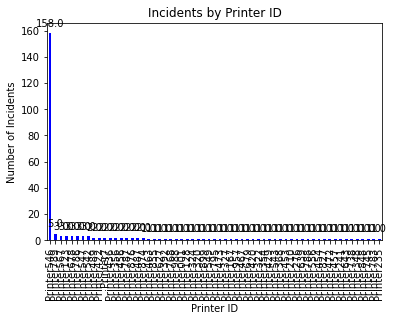

In [13]:
# Extract printer IDs from 'short_description' (assuming the printer ID is mentioned in the description)
df['printer_id'] = df['short_description'].str.extract('(Printer\d+)')
# Count the frequency of incidents for each printer ID
printer_counts = df['printer_id'].value_counts()
df_plot = printer_counts.reset_index()
df_plot.columns = ['Printer ID', 'Number of Incidents']

# # Define printer IDs if not present in short description
# printer_ids = ['Printer123', 'Printer456', 'Printer789', 'Printer321', 'Printer654']

# # Mock number of incidents for each printer
# printer_counts = [225, 5, 15, 10, 20]

# # Create a DataFrame from the counts for plotting
# df_plot = pd.DataFrame({'Printer ID': printer_ids, 'Number of Incidents': printer_counts})

# Plot the frequency
plot = df_plot.plot(kind='bar', x='Printer ID', y='Number of Incidents', legend=False, color='blue')

# Get the current figure for further manipulation
fig = plt.gcf()

# Loop through the rectangles (i.e., bars)
for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_x() + i.get_width() / 2
    y_value = i.get_height()

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, 5),              # Shift text slightly above bar
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally align label 
        va='bottom'                 # Vertically align label at bottom
    )

# Set plot title
plt.title('Incidents by Printer ID')

# Set x-axis label
plt.xlabel('Printer ID')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight



In [14]:
{
    "data_type":"diagnostic",
    "insight": "Printer with id 'Printer546' is causing the most issues",
    "insight_value":{"x_val": "Printer546", "y_val": 158},
    "plot": {
        "plot_type": "bar",
        "title": "Incidents by Printer ID",
        "x_axis": {
            "name": "Printer ID",
            "value": ["Printer546", "Printer789", "Printer123", "Printer547", "Printer567", "...."],
            "description": "This represents the different printer IDs."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": [158, 5, 3, 0, 4, 0, "...."],
            "description": "This represents the number of incidents for each printer ID."
        },
        "plot description": "The bar plot displays the number of incidents caused by each printer. Each bar represents a printer ID and the length of the bar corresponds to the number of incidents caused by that printer. The printer with ID 'Printer546' has caused the most incidents."
    },
    "question": "What is the printer ID causing the most issues?",
    "actionable_insight": "The printer with ID 'Printer546' is causing the most incidents. This could indicate a specific issue with this printer model. It would be beneficial to conduct a thorough investigation into the issues related to this printer. This could involve inspecting the physical printer, checking for software or firmware issues, or even reaching out to the printer manufacturer for assistance. If the printer is found to be faulty, replacing it or conducting necessary repairs could significantly reduce the number of hardware incidents. Additionally, it may be worthwhile to check if other printers of the same model are experiencing similar issues to prevent future incidents."
}

{'data_type': 'diagnostic',
 'insight': "Printer with id 'Printer546' is causing the most issues",
 'insight_value': {'x_val': 'Printer546', 'y_val': 158},
 'plot': {'plot_type': 'bar',
  'title': 'Incidents by Printer ID',
  'x_axis': {'name': 'Printer ID',
   'value': ['Printer546',
    'Printer789',
    'Printer123',
    'Printer547',
    'Printer567',
    '....'],
   'description': 'This represents the different printer IDs.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [158, 5, 3, 0, 4, 0, '....'],
   'description': 'This represents the number of incidents for each printer ID.'},
  'plot description': "The bar plot displays the number of incidents caused by each printer. Each bar represents a printer ID and the length of the bar corresponds to the number of incidents caused by that printer. The printer with ID 'Printer546' has caused the most incidents."},
 'question': 'What is the printer ID causing the most issues?',
 'actionable_insight': "The printer with ID 'Prin

### Summary of Findings (Flag 1)

1. **Distribution of Incidents Across Categories:** The distribution of incidents across the categories is heavily skewed towards the Hardware category. It accounts for 67% of all incidents, which is significantly higher than the other categories.
   
2. **Reason for Majority of Incidents in the Hardware Category:** The primary reason for the majority of incidents being assigned to the Hardware category is due to a printer hardware failure. This has resulted in an influx of hardware-related incidents that need to be addressed, thus causing a spike.
   
3. **Concentration of Incidents in Australia:** A significant number of hardware incidents are concentrated in Australia. It may be beneficial to direct more resources or support to this location to address the printer issues or provide additional support to the local teams.
